More information [here](https://www.cdc.gov/brfss/annual_data/2024/summary_matrix_24.html)

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import XPThandler


file_path = 'data/CVD_cleaned.csv'

print("Loading data... this may take a minute.")
df = pd.read_csv(file_path)

print(f"Data Loaded Successfully! Shape: {df.shape}")
print(df.head())

Loading data... this may take a minute.
Data Loaded Successfully! Shape: (308854, 19)
  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  We

In [43]:
df_dum = pd.get_dummies(df, drop_first=True)
print(df_dum.head())
for col in df_dum.columns:
    print(col)
targets = [
            "Heart_Disease_Yes",
            "Skin_Cancer_Yes",
            "Other_Cancer_Yes",
            "Depression_Yes",
            "Arthritis_Yes",
        ]

   Height_(cm)  Weight_(kg)    BMI  Alcohol_Consumption  Fruit_Consumption  \
0        150.0        32.66  14.54                  0.0               30.0   
1        165.0        77.11  28.29                  0.0               30.0   
2        163.0        88.45  33.47                  4.0               12.0   
3        180.0        93.44  28.73                  0.0               30.0   
4        191.0        88.45  24.37                  0.0                8.0   

   Green_Vegetables_Consumption  FriedPotato_Consumption  General_Health_Fair  \
0                          16.0                     12.0                False   
1                           0.0                      4.0                False   
2                           3.0                     16.0                False   
3                          30.0                      8.0                False   
4                           4.0                      0.0                False   

   General_Health_Good  General_Health_Poor 

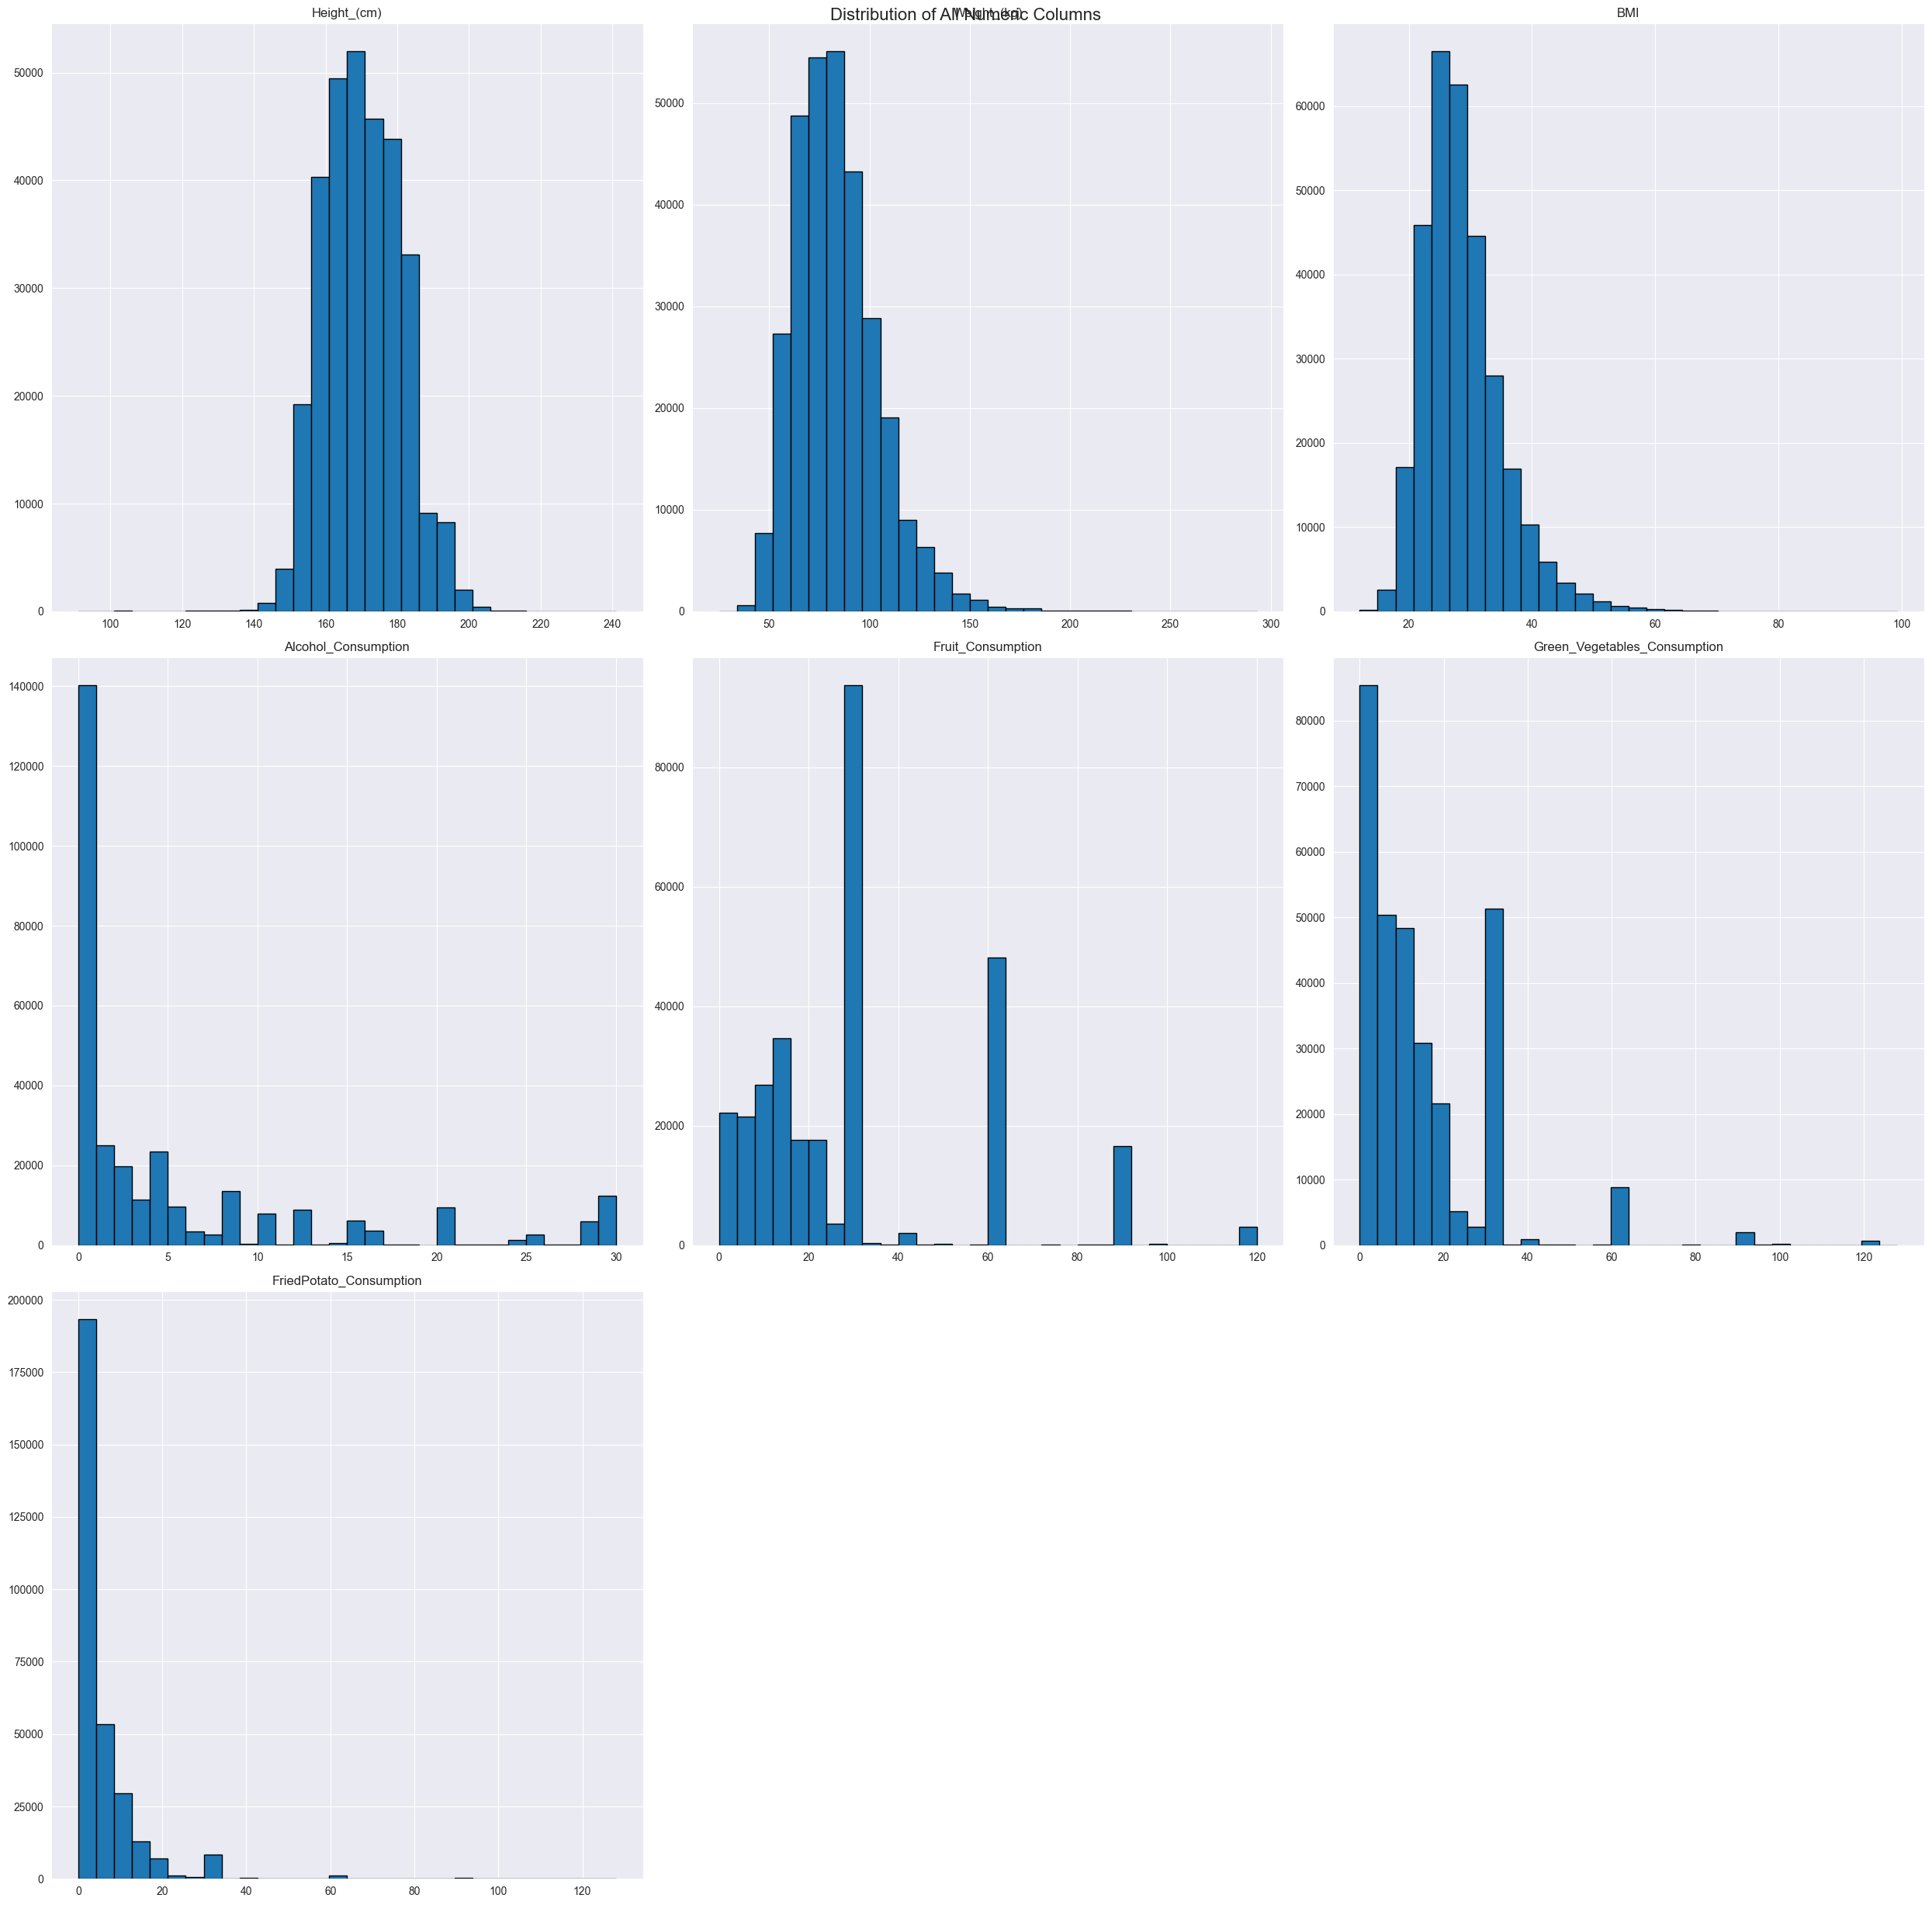

In [44]:
df_dum.hist(
    bins=30,        # number of bins per histogram
    figsize=(25, 25),  # overall figure size
    edgecolor='black'  # add border for clarity
)

plt.suptitle("Distribution of All Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

In [45]:
print(df.describe())

         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000          

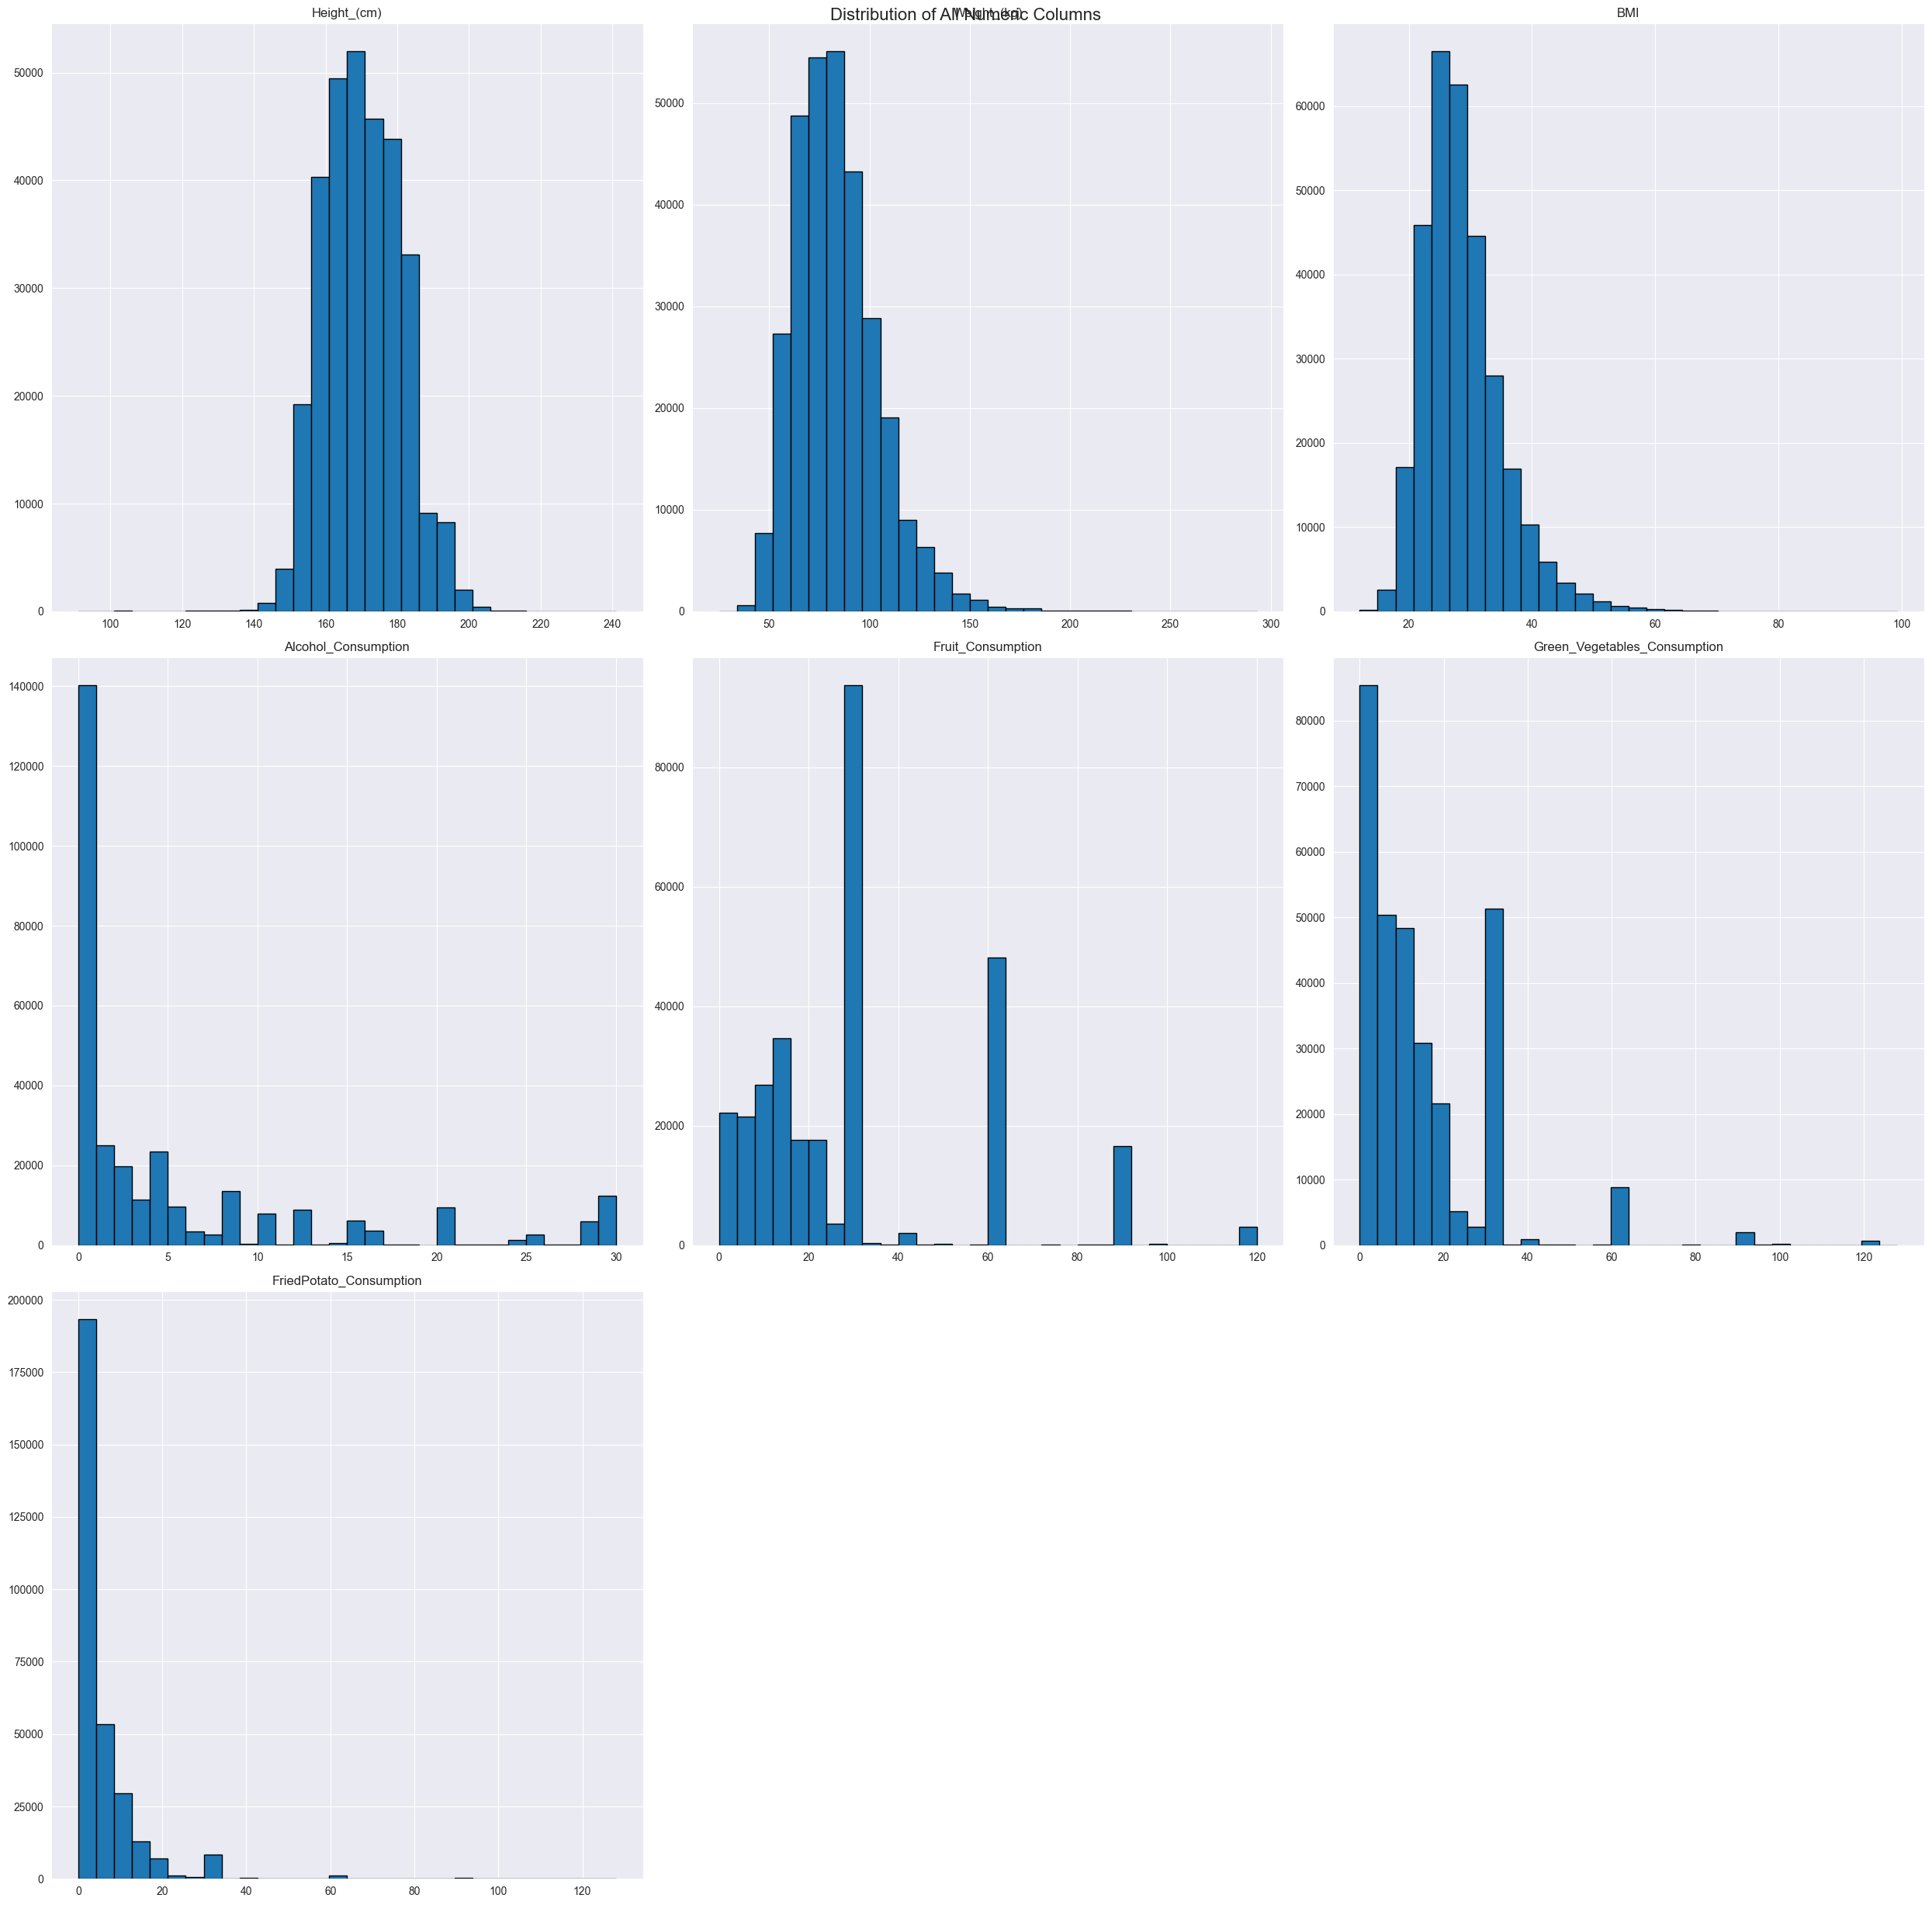

In [46]:
df_dum.hist(
    bins=30,        # number of bins per histogram
    figsize=(25, 25),  # overall figure size
    edgecolor='black'  # add border for clarity
)

plt.suptitle("Distribution of All Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()
plt.close()

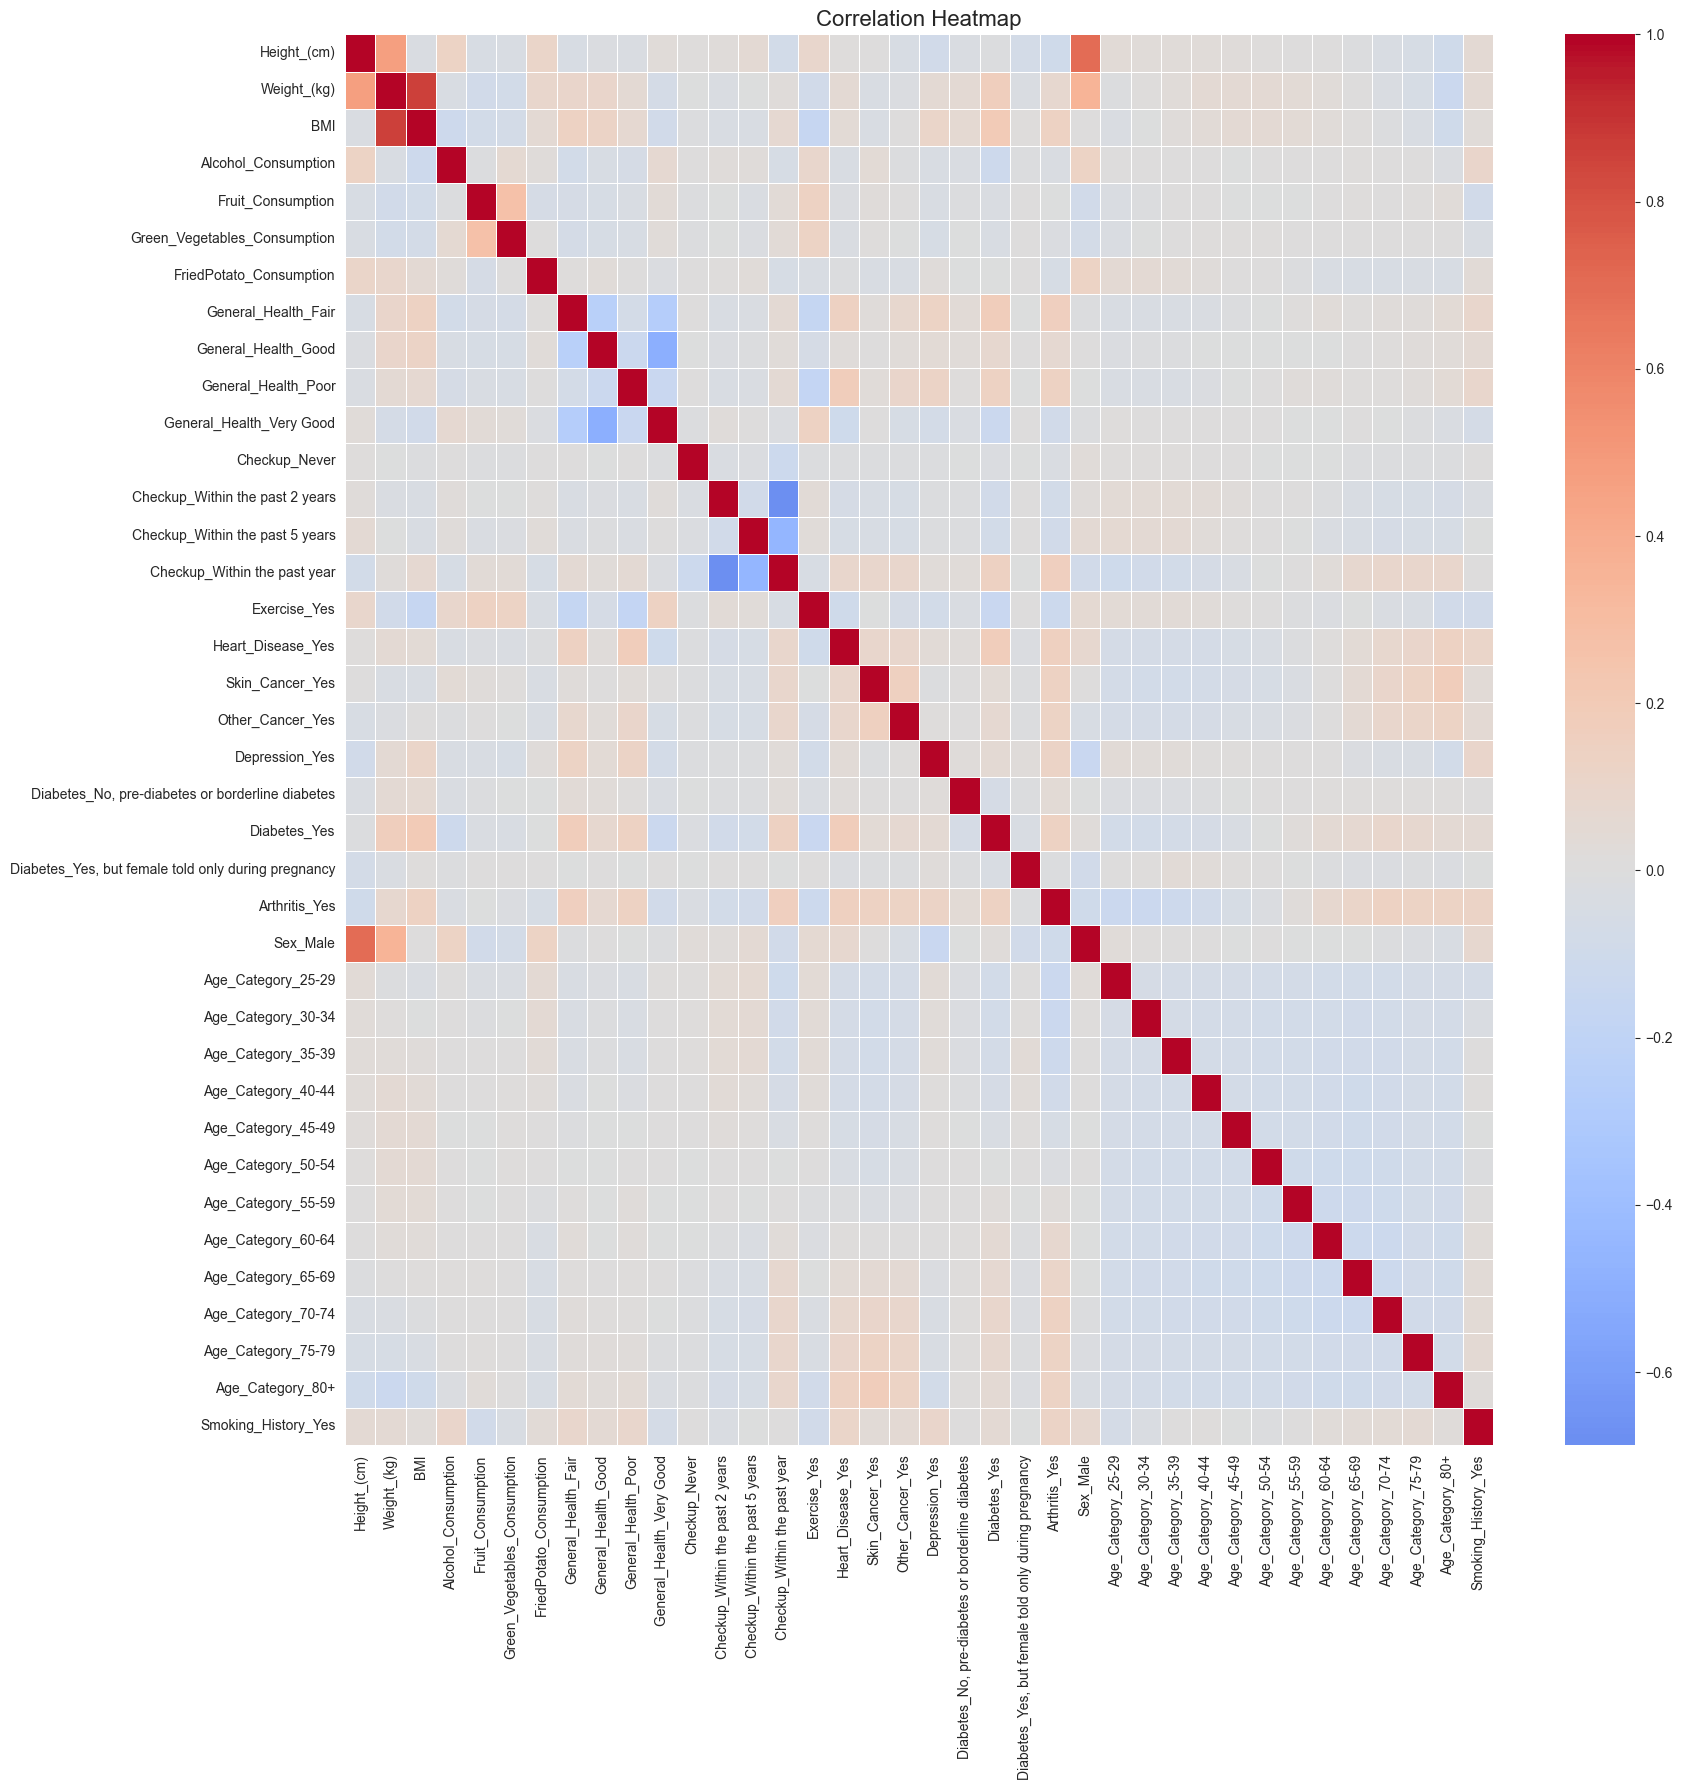

In [47]:
corr = df_dum.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(18,18))
sns.heatmap(
    corr,
    annot=False,        # show correlation values
    fmt=".1f",         # format to 2 decimals
    cmap="coolwarm",   # color palette
    center=0,          # center colormap at 0
    linewidths=0.5     # lines between cells
)

plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()
plt.close()

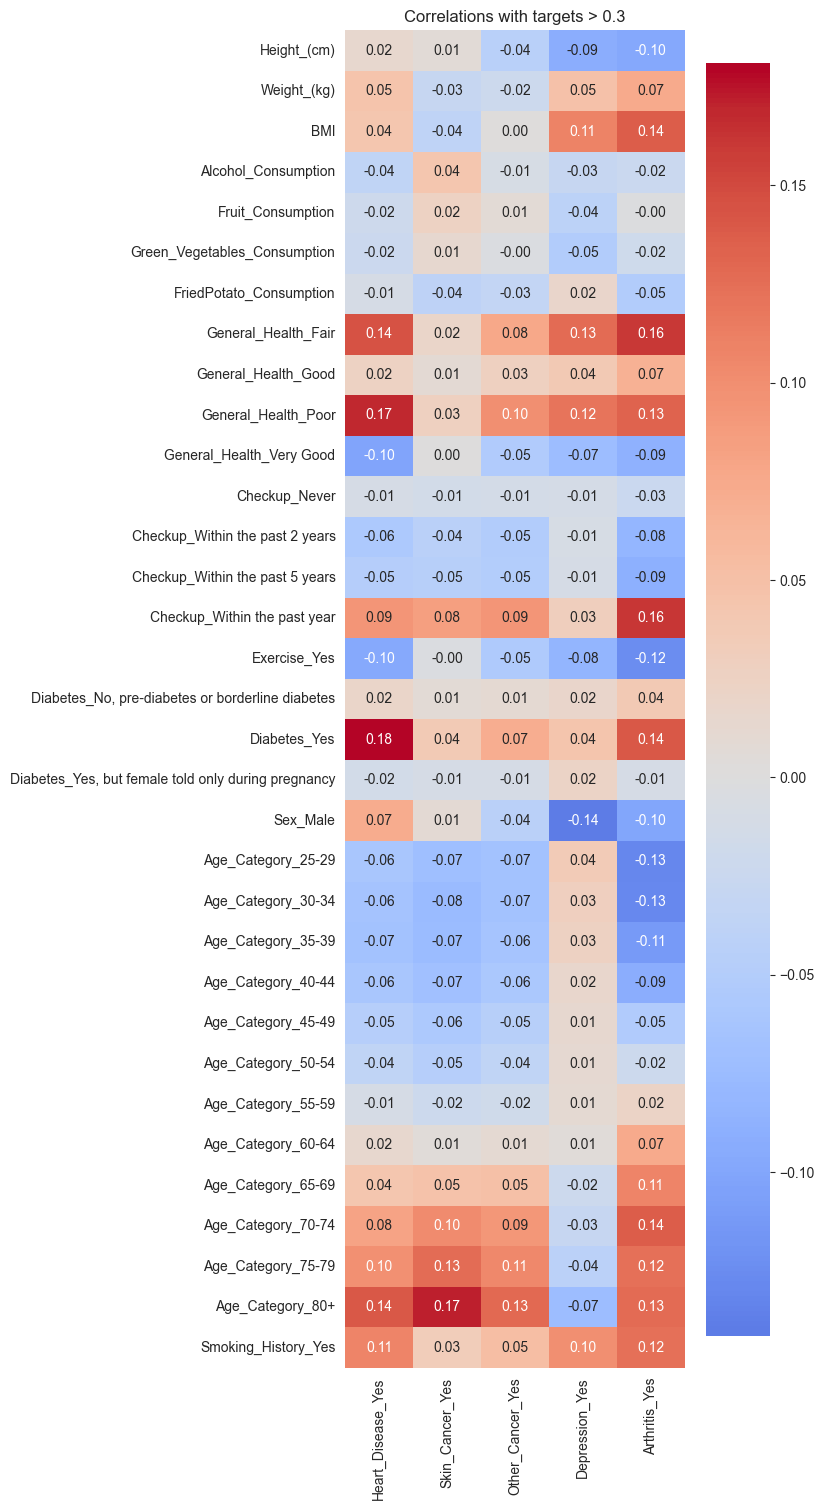

In [48]:
threshold = 0.3
corr = df_dum.corr()[targets]
corr = corr.drop(index=targets, errors='ignore')  # remove targets from rows

if corr.empty:
    print(f"No correlations above {threshold}")
else:
   plt.figure(figsize=(8, len(corr) * 0.4 + 2))
   sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
   plt.title(f'Correlations with targets > {threshold}')
   plt.tight_layout()
   plt.show()

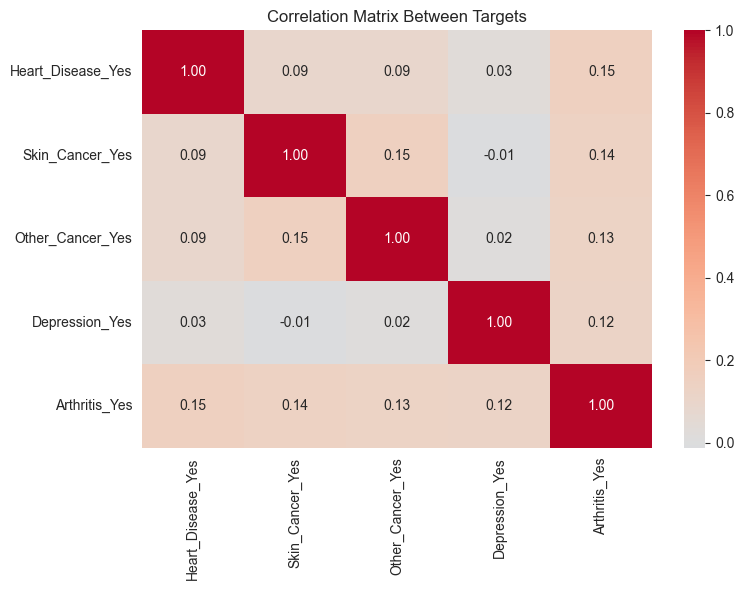

In [49]:
# Correlation matrix between targets only
corr_targets = df_dum[targets].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_targets, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Between Targets')
plt.tight_layout()
plt.show()

In [50]:
df_dum.to_csv('data/CVD_cleaned_dummies.csv',
              index=False,
              )